# Figure S1. Biological heterogeneity maps

In [1]:
import set_env  # not included in the repo, defines $PROJECT_DIR, $PNC_PROJECT_DIR and $IMAGEN_PROJECT_DIR

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

OUTPUT_DIR = {
    "pnc": os.path.join(os.environ["PNC_PROJECT_DIR"], "output"),
    "imagen": os.path.join(os.environ["IMAGEN_PROJECT_DIR"], "output"),
}
INPUT_DIR = os.environ["INPUT_DIR"]
CODE_DIR = os.path.join(os.getcwd(), "..", "scripts")
sys.path.append(CODE_DIR)

from utils import transform, plot, datasets

import warnings
warnings.filterwarnings("ignore")

plt.rcParams.update({"font.size": 12, "font.family": "Asana Math", "figure.dpi": 300})

/data/project/ei_development/env/lib/python3.10/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


Load parcellated maps:

In [3]:
maps = datasets.load_maps('schaefer-100', '6maps')

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


Plot them:

myelinmap


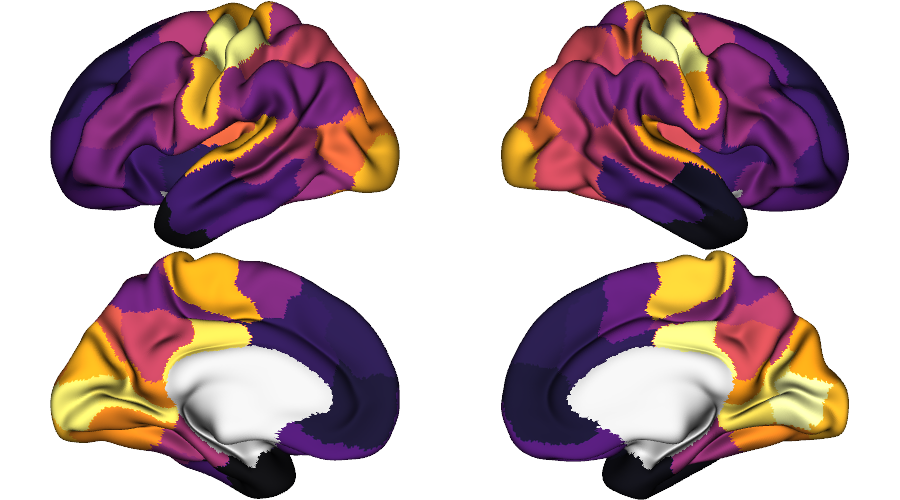

thickness


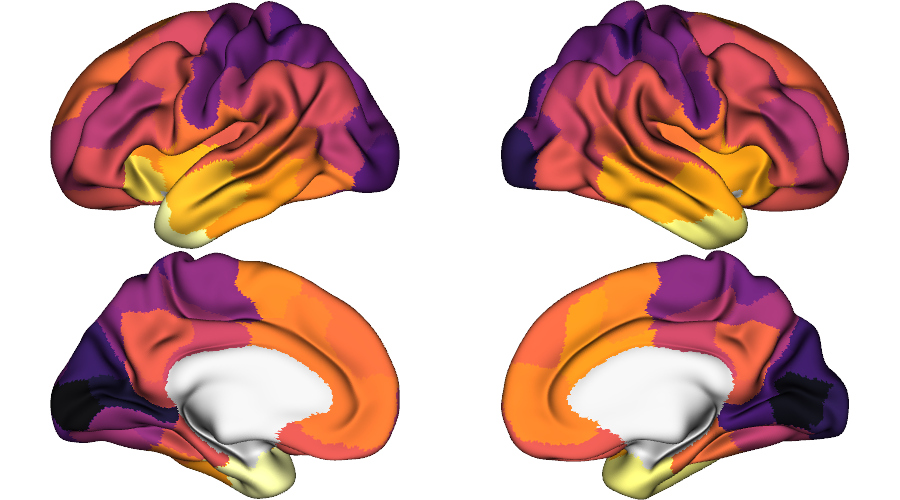

fcgradient01


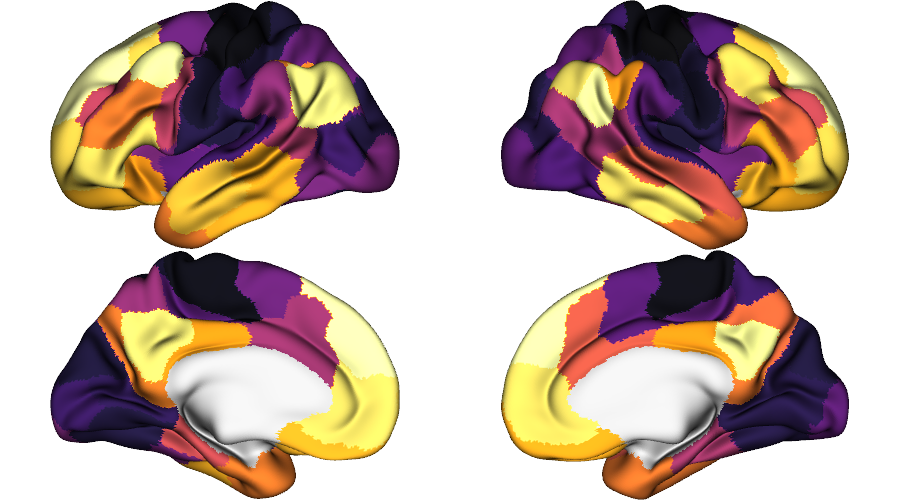

genepc1


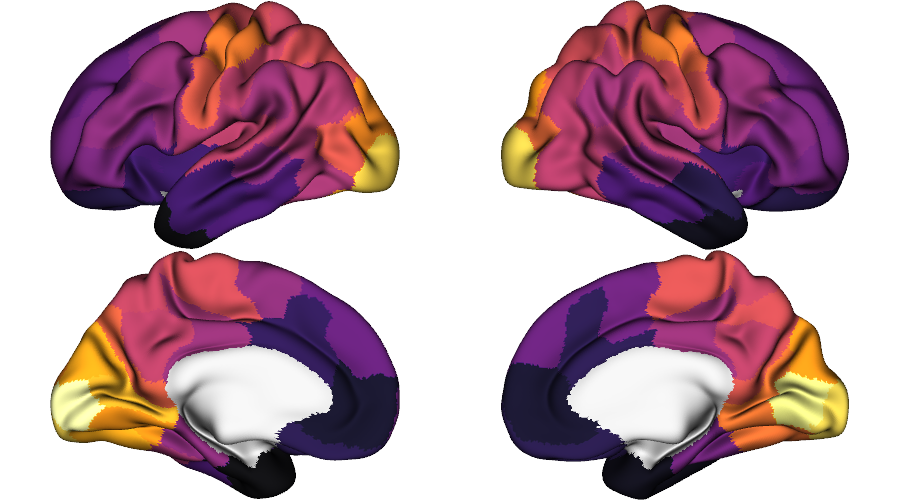

nmda


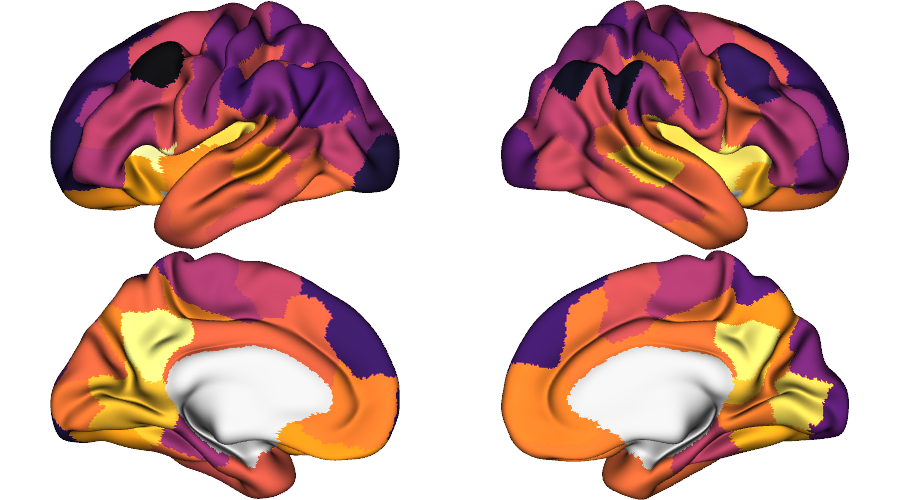

gabaa


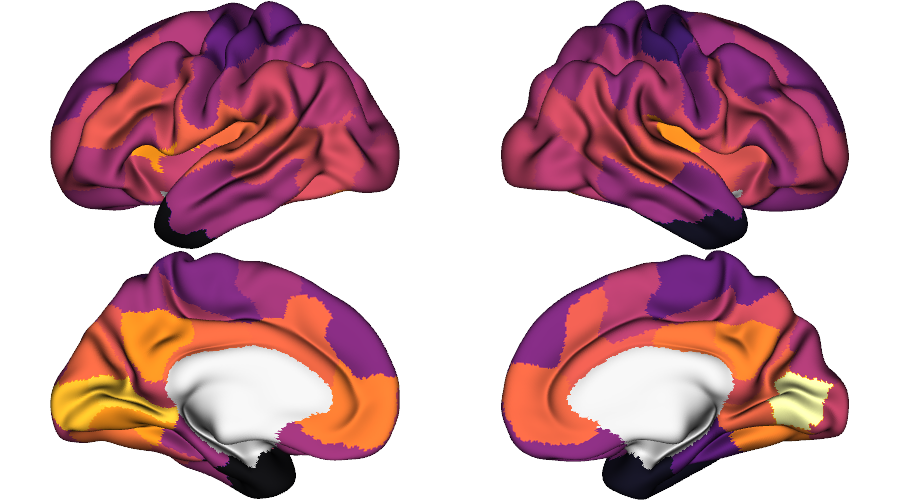

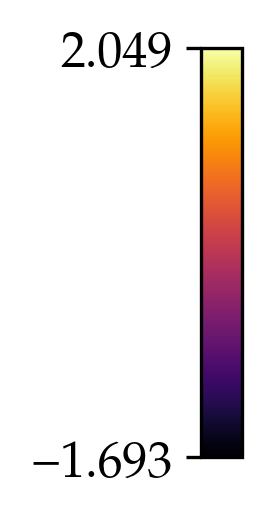

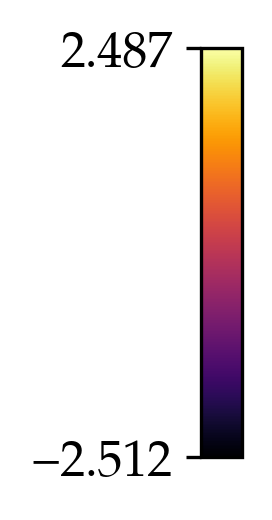

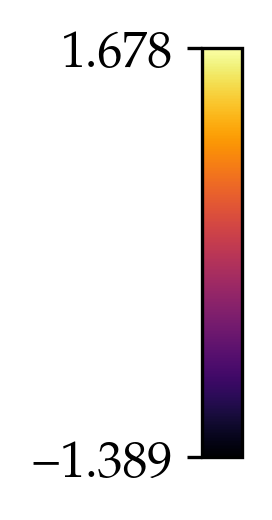

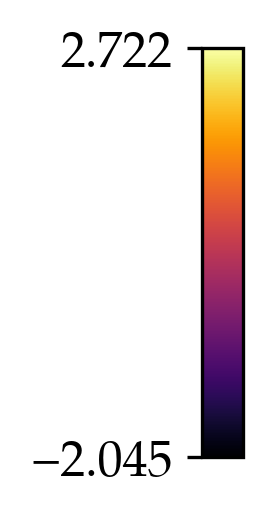

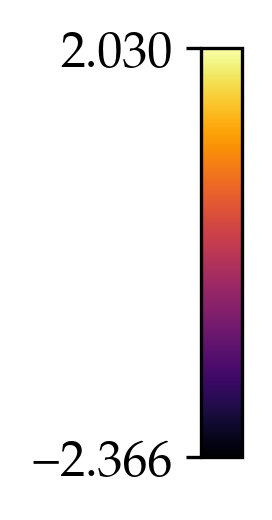

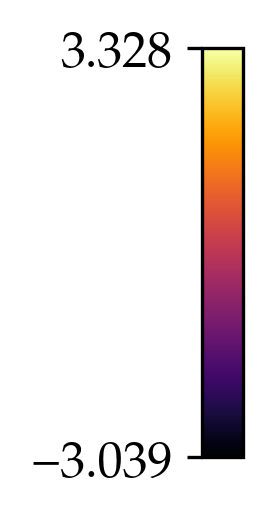

In [4]:
for col in maps.columns:
    print(col)
    display(
        plot.plot_surface(
            transform.deparcellate_surf(maps[col], 'schaefer-100', concat=True, space='fsaverage'), 
            'fsaverage', mesh_kind='semi-inflated',
            cmap='inferno', cbar=False, layout_style='grid',
        )
    )
    plot.plot_colorbar(maps[col].values.min(), maps[col].values.max(), 'inferno', figsize=(2, 2))

For running the simulations based on these heterogeneity maps, save them as a text file:

In [5]:
np.savetxt(os.path.join(INPUT_DIR, '6maps_schaefer-100_zscore.txt'), maps.values.T, fmt="%f")